In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistic

pd.set_option('display.max_columns', None)

In [31]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [32]:
train = pd.concat([train,test])

In [33]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train = train.drop(['Utilities'], axis=1)
train["Functional"] = train["Functional"].fillna("Typ")
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")

RuntimeError: The data contains non-finite values.

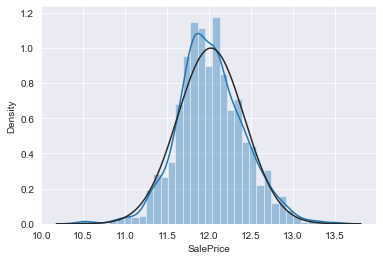

In [36]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [37]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape train: {}'.format(train.shape))

Shape train: (2919, 80)


In [39]:
train.to_csv('df.csv')

In [40]:
from pycaret.datasets import get_data
modelo = get_data('df')
from pycaret.regression import *
exp_name = setup(data = modelo,  target = 'SalePrice')

,Description,Value
0,session_id,652
1,Target,SalePrice
2,Original Data,"(2919, 81)"
3,Missing Values,True
4,Numeric Features,26
5,Categorical Features,54
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1027, 361)"


In [41]:
exp_name = setup(data = modelo,  target = 'SalePrice')
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0853,0.0171,0.1276,0.8855,0.0098,0.0071,0.1280
ridge,Ridge Regression,0.0893,0.0180,0.1315,0.8801,0.0101,0.0075,0.0450
lightgbm,Light Gradient Boosting Machine,0.0968,0.0201,0.1404,0.8694,0.0108,0.0081,0.3550
gbr,Gradient Boosting Regressor,0.0978,0.0208,0.1420,0.8661,0.0109,0.0082,0.5080
omp,Orthogonal Matching Pursuit,0.0940,0.0218,0.1422,0.8555,0.0109,0.0079,0.0390
rf,Random Forest Regressor,0.1018,0.0233,0.1505,0.8497,0.0116,0.0085,1.3070
lr,Linear Regression,0.0999,0.0229,0.1477,0.8485,0.0114,0.0084,0.7000
huber,Huber Regressor,0.1127,0.0294,0.1684,0.8062,0.0130,0.0094,0.5250
en,Elastic Net,0.1152,0.0301,0.1707,0.8013,0.0132,0.0096,0.0640
et,Extra Trees Regressor,0.1168,0.0320,0.1771,0.7931,0.0137,0.0098,1.4990


In [42]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0949,0.0187,0.1367,0.8670,0.0106,0.0079
1,0.0883,0.0146,0.1207,0.9027,0.0093,0.0074
2,0.0839,0.0129,0.1134,0.9147,0.0086,0.0070
3,0.0996,0.0210,0.1449,0.8719,0.0115,0.0085
4,0.1162,0.0272,0.1650,0.8675,0.0125,0.0096
5,0.0860,0.0140,0.1184,0.8624,0.0091,0.0071
6,0.0916,0.0163,0.1275,0.9015,0.0098,0.0076
7,0.1058,0.0282,0.1679,0.8613,0.0132,0.0089
8,0.0934,0.0181,0.1344,0.8849,0.0103,0.0078
9,0.1078,0.0306,0.1749,0.7605,0.0134,0.0091


In [47]:
Bayesian_Ridge = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0793,0.0124,0.1115,0.9115,0.0087,0.0066
1,0.0760,0.0117,0.1081,0.9219,0.0085,0.0064
2,0.0833,0.0139,0.1177,0.9081,0.0089,0.0069
3,0.0845,0.0143,0.1194,0.9130,0.0094,0.0071
4,0.0816,0.0146,0.1208,0.9290,0.0094,0.0068
5,0.0782,0.0115,0.1071,0.8874,0.0082,0.0065
6,0.0911,0.0155,0.1244,0.9063,0.0096,0.0076
7,0.0956,0.0202,0.1422,0.9006,0.0112,0.0081
8,0.0876,0.0143,0.1195,0.9090,0.0093,0.0074
9,0.0960,0.0423,0.2058,0.6684,0.0152,0.0081


In [48]:
tuned_Bayesian_Ridge = tune_model(Bayesian_Ridge,optimize= 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0793,0.0125,0.1116,0.9113,0.0087,0.0066
1,0.0760,0.0117,0.1082,0.9218,0.0085,0.0064
2,0.0832,0.0138,0.1176,0.9083,0.0089,0.0069
3,0.0847,0.0142,0.1193,0.9132,0.0094,0.0071
4,0.0816,0.0146,0.1207,0.9291,0.0094,0.0068
5,0.0783,0.0115,0.1073,0.8871,0.0082,0.0065
6,0.0912,0.0155,0.1245,0.9061,0.0096,0.0076
7,0.0960,0.0202,0.1420,0.9008,0.0112,0.0081
8,0.0876,0.0143,0.1196,0.9089,0.0093,0.0073
9,0.0961,0.0422,0.2054,0.6696,0.0152,0.0081


In [43]:
tuned_lightgbm = tune_model(lightgbm,optimize= 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1090,0.0218,0.1477,0.8446,0.0115,0.0091
1,0.1157,0.0224,0.1496,0.8505,0.0117,0.0097
2,0.0989,0.0187,0.1368,0.8759,0.0104,0.0082
3,0.1028,0.0210,0.1451,0.8717,0.0115,0.0087
4,0.1222,0.0301,0.1734,0.8536,0.0132,0.0101
5,0.1029,0.0182,0.1350,0.8213,0.0103,0.0086
6,0.1116,0.0227,0.1505,0.8628,0.0116,0.0093
7,0.1163,0.0301,0.1735,0.8519,0.0137,0.0099
8,0.1209,0.0274,0.1654,0.8257,0.0128,0.0101
9,0.1163,0.0344,0.1854,0.7308,0.0142,0.0098


In [57]:
blender_specific_tune = tune_model(blender_specific,optimize= 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0729,0.0108,0.1041,0.9228,0.0081,0.0061
1,0.0729,0.0104,0.1019,0.9306,0.0080,0.0061
2,0.0799,0.0112,0.1060,0.9255,0.0081,0.0066
3,0.0723,0.0120,0.1096,0.9268,0.0087,0.0061
4,0.0880,0.0168,0.1294,0.9185,0.0099,0.0073
5,0.0703,0.0096,0.0981,0.9056,0.0075,0.0058
6,0.0827,0.0128,0.1130,0.9226,0.0087,0.0069
7,0.0964,0.0203,0.1424,0.9002,0.0112,0.0082
8,0.0883,0.0158,0.1257,0.8993,0.0096,0.0074
9,0.0928,0.0367,0.1916,0.7123,0.0143,0.0078


In [55]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5),
                                choose_better= True,
                                optimize='RMSLE',)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0732,0.0110,0.1047,0.9220,0.0082,0.0061
1,0.0727,0.0103,0.1014,0.9313,0.0079,0.0061
2,0.0764,0.0103,0.1016,0.9316,0.0078,0.0063
3,0.0748,0.0124,0.1114,0.9243,0.0088,0.0063
4,0.0890,0.0166,0.1288,0.9193,0.0099,0.0074
5,0.0699,0.0094,0.0971,0.9076,0.0074,0.0058
6,0.0820,0.0126,0.1123,0.9236,0.0087,0.0068
7,0.0951,0.0202,0.1421,0.9006,0.0112,0.0081
8,0.0868,0.0155,0.1245,0.9013,0.0095,0.0072
9,0.0928,0.0355,0.1884,0.7221,0.0141,0.0078


In [61]:
predict_model(blender_specific_tune)
#0.0171
#lightgbm - 0.0127
# blender_specific -	0.0110

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0811,0.0206,0.1436,0.8730,0.0110,0.0068


,Unnamed 0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,1015.0,70.0,8400.0,2001.0,2001.0,0.0,643.0,0.0,167.0,810.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.332709,12.229574
1,711.0,66.0,8712.0,1900.0,1950.0,0.0,0.0,0.0,859.0,859.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.540317,11.309865
2,342.0,73.0,8544.0,1949.0,1950.0,340.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.379406,11.396559
3,150.0,120.0,10356.0,1975.0,1975.0,0.0,716.0,0.0,253.0,969.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.711784,11.840907
4,1122.0,65.0,8926.0,1956.0,1956.0,0.0,0.0,0.0,672.0,672.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.626263,11.223975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,588.0,65.0,25095.0,1968.0,2003.0,0.0,1324.0,0.0,113.0,1437.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.870607,12.354147
432,767.0,75.0,12508.0,1940.0,1985.0,0.0,660.0,0.0,323.0,983.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.982935,11.967710
433,913.0,82.0,6270.0,1949.0,1950.0,0.0,284.0,0.0,717.0,1001.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.884496,11.976598
434,1371.0,80.0,9600.0,1955.0,1996.0,0.0,831.0,0.0,161.0,992.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.016732,11.995698
